In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('hr project.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observation: There is no null values in data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observation: we have 26 numerical and 9 objects columns

<AxesSubplot:>

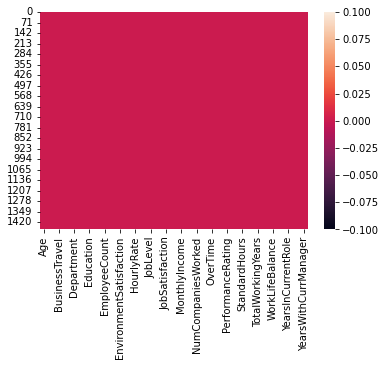

In [6]:
# checking outliers
sns.heatmap(df.isnull())

Observation: no null values in data

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000




Observation:-

- No missing values in the dataset
- we have 26 numerical and 9 objects columns
- Though features are not normaly distributed, are close to normality
- minimum age is 18 and max is 60 which is logical
- min hour rate is 30.00 and mean is 65.00 and max 100
- Standard Hours are 80.
- Each feature has difference scale range

<AxesSubplot:xlabel='Attrition', ylabel='count'>

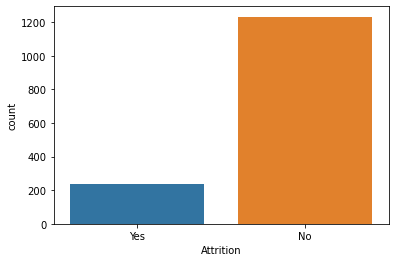

In [8]:
sns.countplot(df['Attrition'])

Observation: Data is imabalance(will deal with)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [11]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('============================================')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human 

Observation: 

    in above cell see the unique values in every object columns
    In column "Over18" that one unique value which not hellfull for data so better to drop it



# checking unique values in other Numerical columns

In [12]:
df['EmployeeNumber'].nunique()

1470

In [13]:
df['EmployeeCount'].nunique()

1

Observation: that has one unique value so drop it

In [14]:
df['StandardHours'].nunique()

1

Observation: that has one unique value so drop it

In [15]:
df['HourlyRate'].nunique()

71

In [16]:
df['PercentSalaryHike'].nunique()

15

# droping useless columns

In [17]:
df=df.drop(['EmployeeCount','StandardHours','Over18'],axis=1)

In [18]:
df.shape

(1470, 32)

# Exploratory Data Analysis:

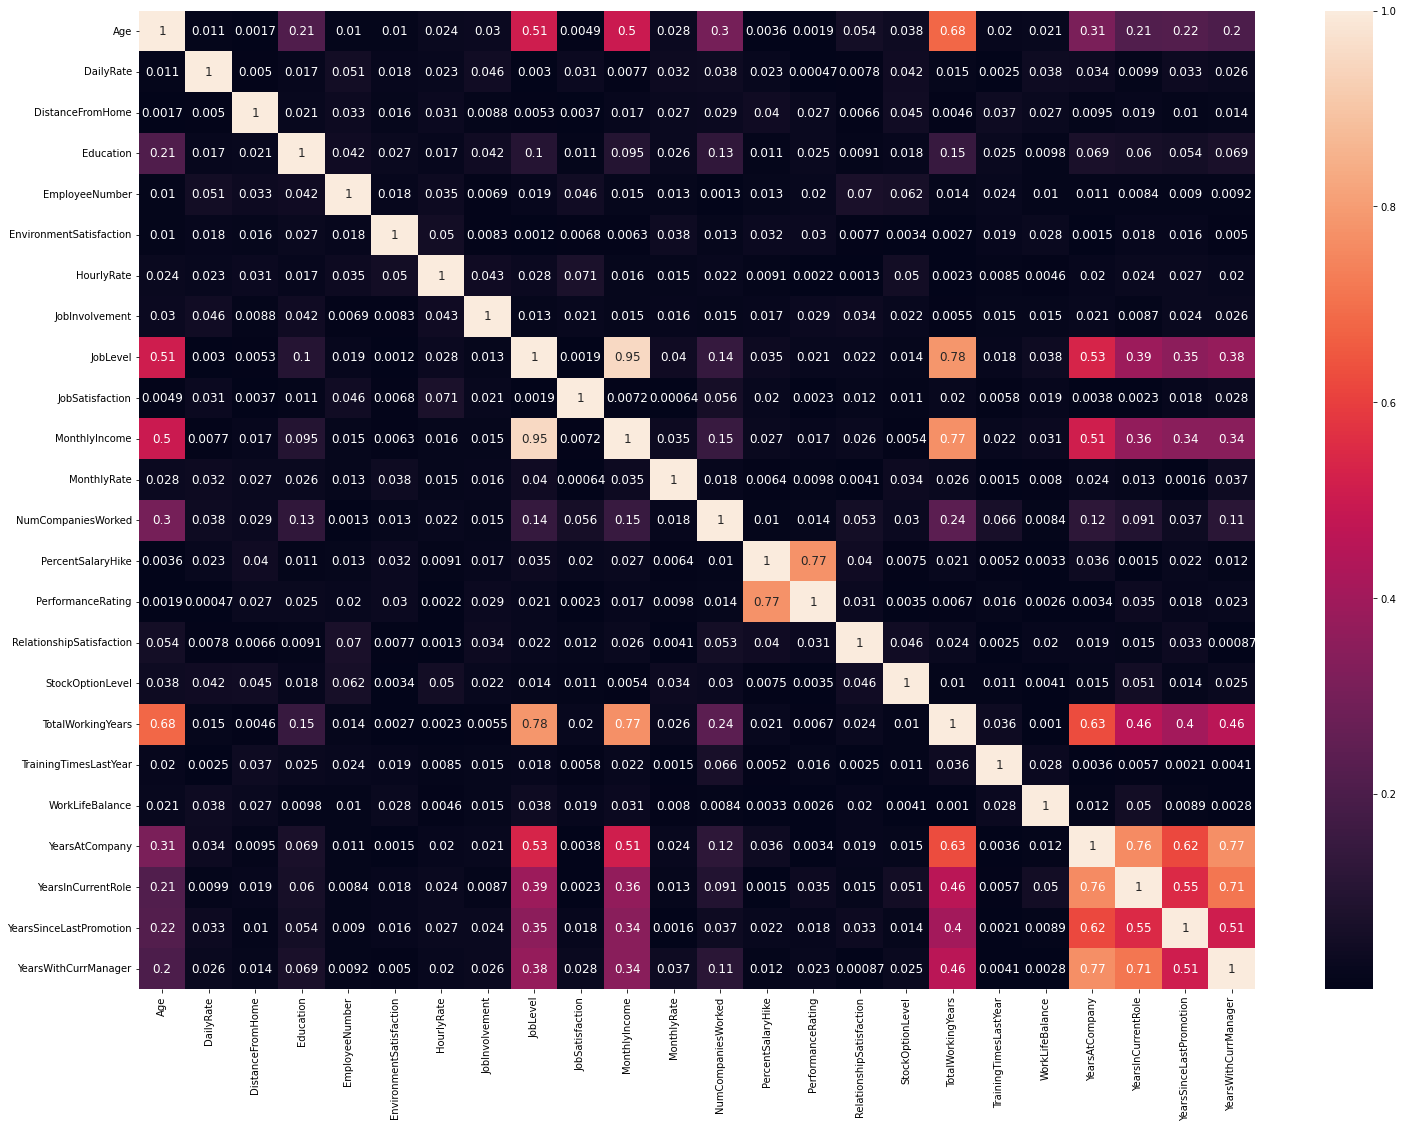

In [19]:
df_corr=df.corr().abs()

plt.figure(figsize=(25,18))
sns.heatmap(df_corr,annot=True,annot_kws={'size':12})
plt.show()

Observation: 

    Here we see the correlation :-

        TotalWorkingYear having positive correlation

         - with Age that means there are are empl working from long time,
         - with monthly income means got hike on salaries as well because of long years in company
         - with yearsincurrentrole and currentmanager means when you working from long time on same role
         with same manager as well

        PercentOfHike a correlation with PerfomanceRating means the perfomance helps to get hike.

In [20]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

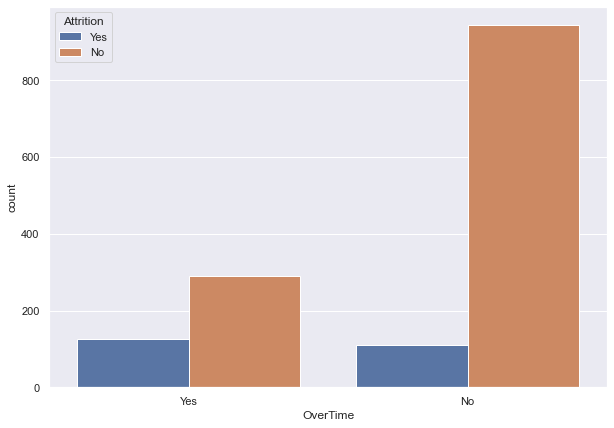

In [21]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='OverTime', hue='Attrition',data= df )

Observation: most of the empl are no working overtime in company

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

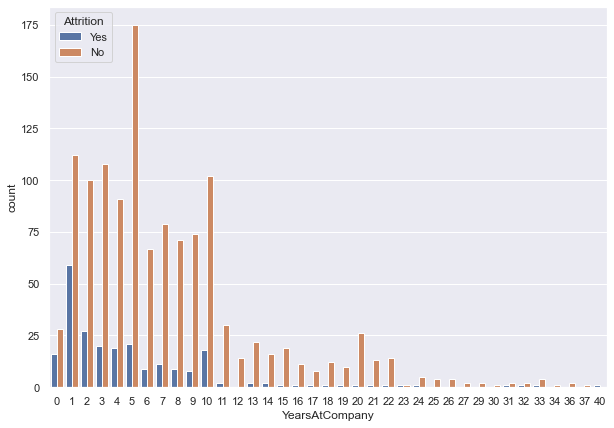

In [22]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='YearsAtCompany', hue='Attrition',data= df )

Observation: 

    around 100 to 125 empl are working from 2, 3, 4 adn 11 year in company
    around 175 empl are working from 5 years in company
    very less no of empl are working from 10 year more

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

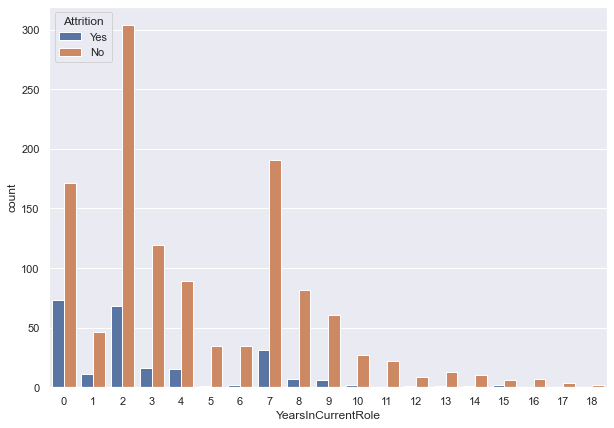

In [23]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='YearsInCurrentRole', hue='Attrition',data= df )

Observation: 

    around 170 empl are working from less than a year old in company
    around 300 empl are working on same role not promoted
    we one more larger figure around 190 empl are working from 7 years on same role not promoted

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

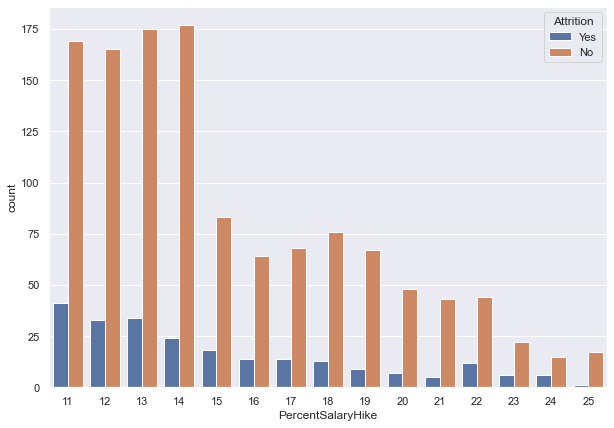

In [24]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='PercentSalaryHike', hue='Attrition',data= df )

Observation: 

    most of hike given is 11,12,13,14 to maximum empl.
    more than 15% hike given less empl must be working from very long

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

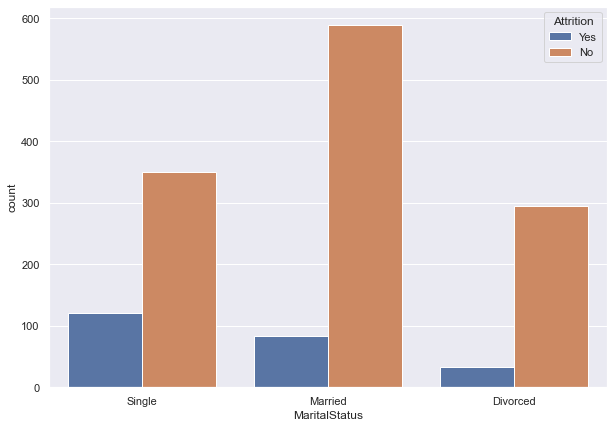

In [25]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='MaritalStatus', hue='Attrition',data= df )

Observation: Max attrition we in those empl those are single

<AxesSubplot:xlabel='Age', ylabel='count'>

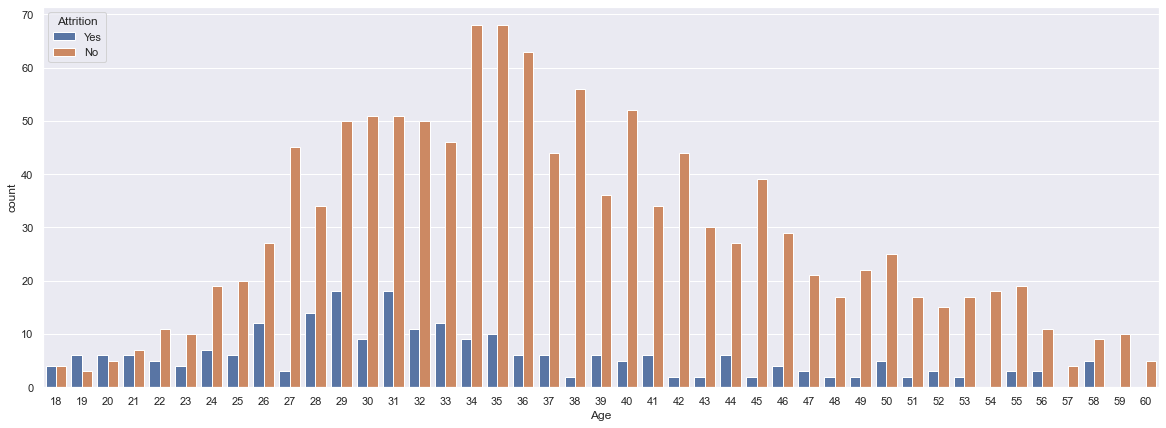

In [26]:
plt.figure(figsize=(20, 7))
sns.countplot(x='Age', hue='Attrition',data= df )

Observation: 

    we can notice maximum no of employees are age of 34,35,36 those are working.
    majority of employees are 27 to 45 of age those are working.
    max of attrition are in age of 28,29,31. those are not workig anymore
    in age of 18 of majority is same

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

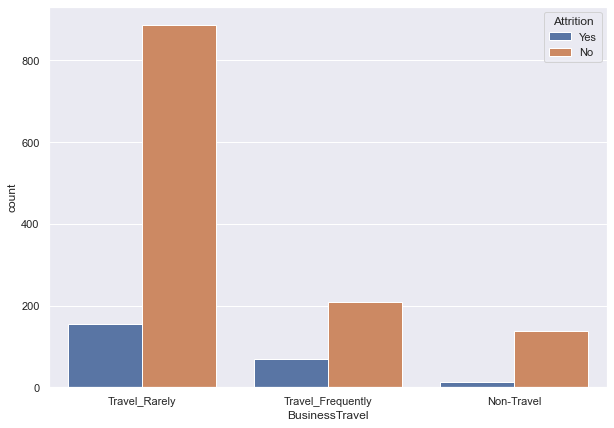

In [27]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='BusinessTravel', hue='Attrition',data= df )

Observation:

    max working are in Travel_Rarely category
    In other two category we have very less employee
    there is very less attrition in Non-Travel category



<AxesSubplot:xlabel='Department', ylabel='count'>

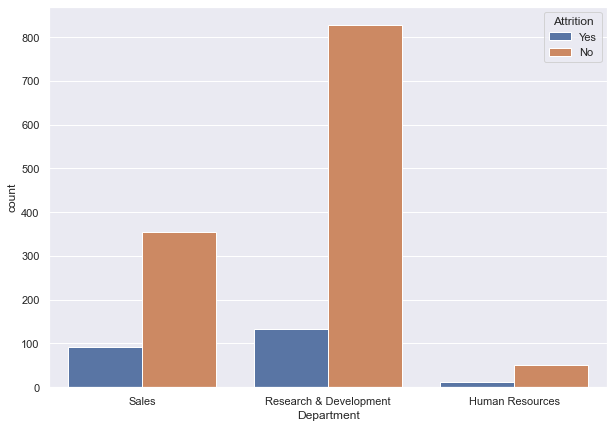

In [28]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Department', hue='Attrition',data= df )

Observation: most of working employee are in R&D depart

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

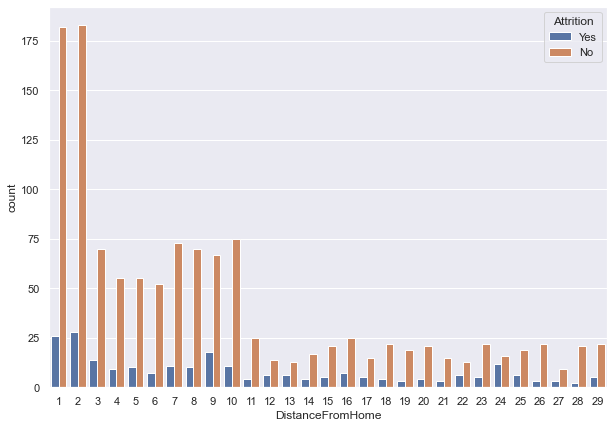

In [29]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='DistanceFromHome', hue='Attrition',data= df )

Observation: There we have very locical figures most of working employees having very short dist. from home 

<AxesSubplot:xlabel='Education', ylabel='count'>

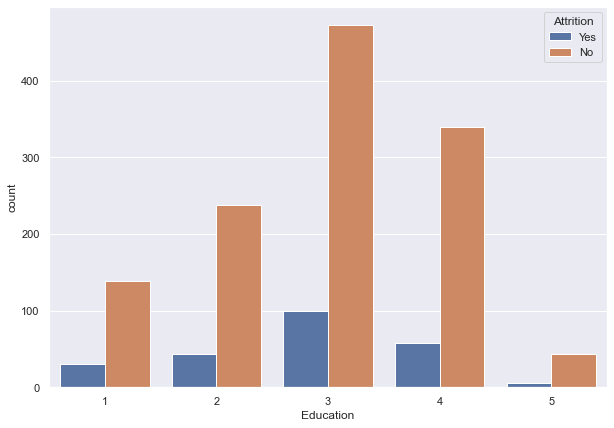

In [30]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Education', hue='Attrition',data= df )

Observation: 

    very less employees in higher education
    most of emp are middle educated
    Attrition is also high in middle educated empl.

<AxesSubplot:xlabel='Gender', ylabel='count'>

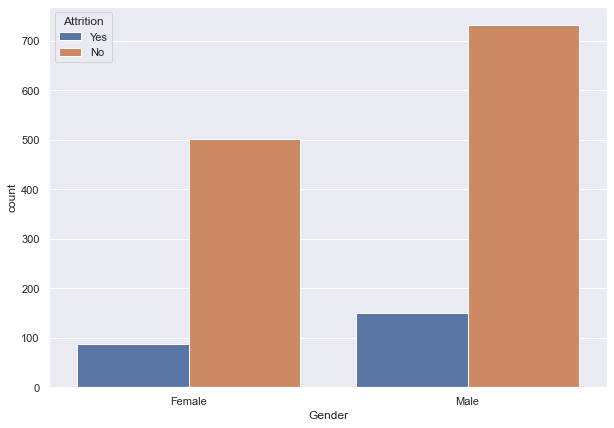

In [31]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='Gender', hue='Attrition',data= df )

Observation: Attrition percente is almost same in both male and female

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

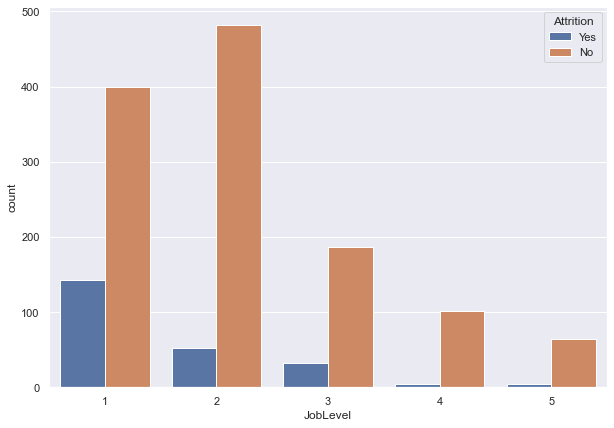

In [32]:
plt.figure(figsize=(10, 7))
sns. set(color_codes=True)
sns.countplot(x='JobLevel', hue='Attrition',data= df )

Observation: max attrition we see where we have more job roles

In [33]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


# Using LabelEncoder for convering categorical to numerical

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeNumber            1470 non-null   int64
 9   EnvironmentSatisfaction   1470 non-null   int64
 10  Gender                    1470 non-null   int32
 11  HourlyRate                1470 non-null   int64
 12  JobInvolvement            1470 non-null   int64
 13  JobLevel                  1470 non-null   int64
 14  JobRole                   1470 non-null 

Observation: All columns are converted into numerical now

# Skewness handling

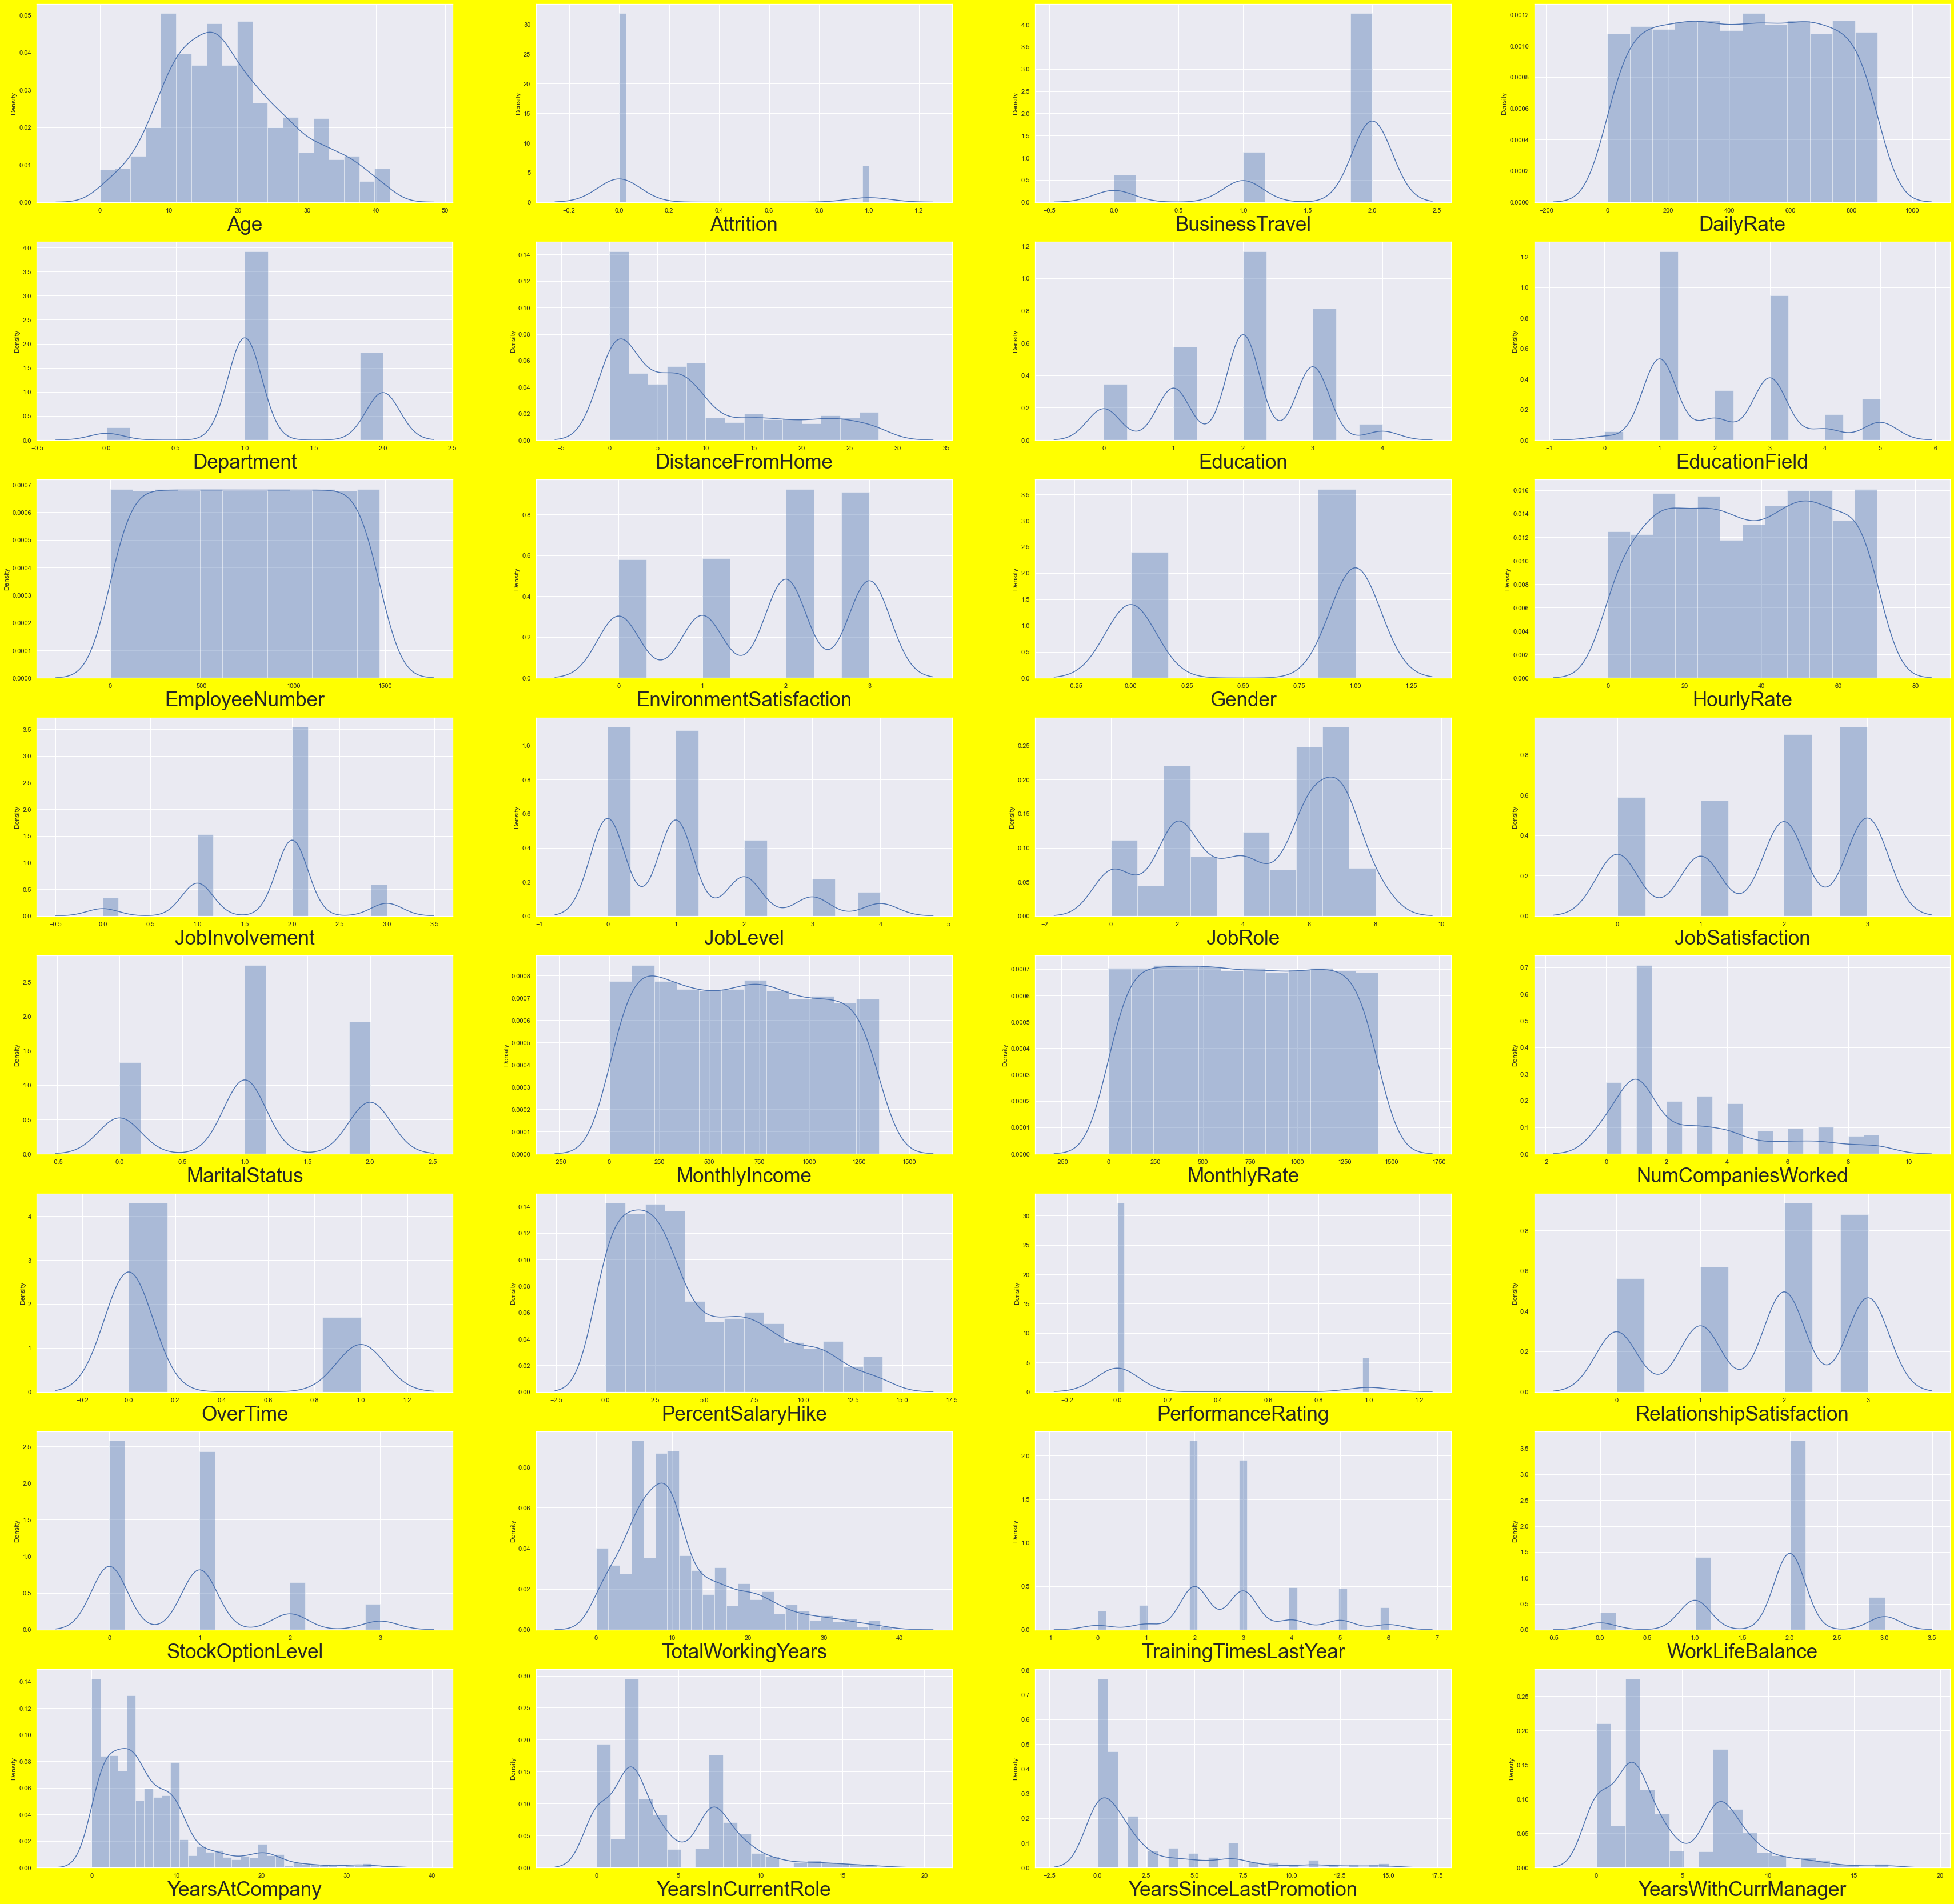

In [38]:
plt.figure(figsize=(60,60),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=35)
        
        plotnumber+=1
plt.show()

In [39]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
W

Observation: 
skewness more than+/- 0.5 will we treated
object and attrition columns will no be treated

we can see here most of the columns are skewed
will only deal with numercal columns

   -- DistanceFromHome
   --EducationField
   -- JobLevel
   -- NumCompaniesWorked
   -- NumCompaniesWorked
   -- OverTime
   --PercentSalaryHike
   -- StockOptionLevel
   -- TotalWorkingYears
   -- TrainingTimesLastYear
   -- WorkLifeBalance
   -- YearsAtCompany
   -- YearsInCurrentRole
   -- YearsWithCurrManager

will be treated

In [40]:
from sklearn.preprocessing import power_transform

In [41]:
df[['DistanceFromHome','EducationField','JobLevel','NumCompaniesWorked','NumCompaniesWorked','OverTime','PercentSalaryHike',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
    'YearsInCurrentRole','YearsWithCurrManager']]=power_transform(
    df[['DistanceFromHome','EducationField','JobLevel','NumCompaniesWorked','NumCompaniesWorked','OverTime','PercentSalaryHike',
    'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
    'YearsInCurrentRole','YearsWithCurrManager']],method='yeo-johnson')

In [42]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome           -0.060046
Education                  -0.289681
EducationField             -0.008386
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.057017
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike          -0.050437
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010839
TrainingTimesLastYear       0.058058
W

Observation: we can see here skewness is removed from all numerical columns

# Outliers Handling

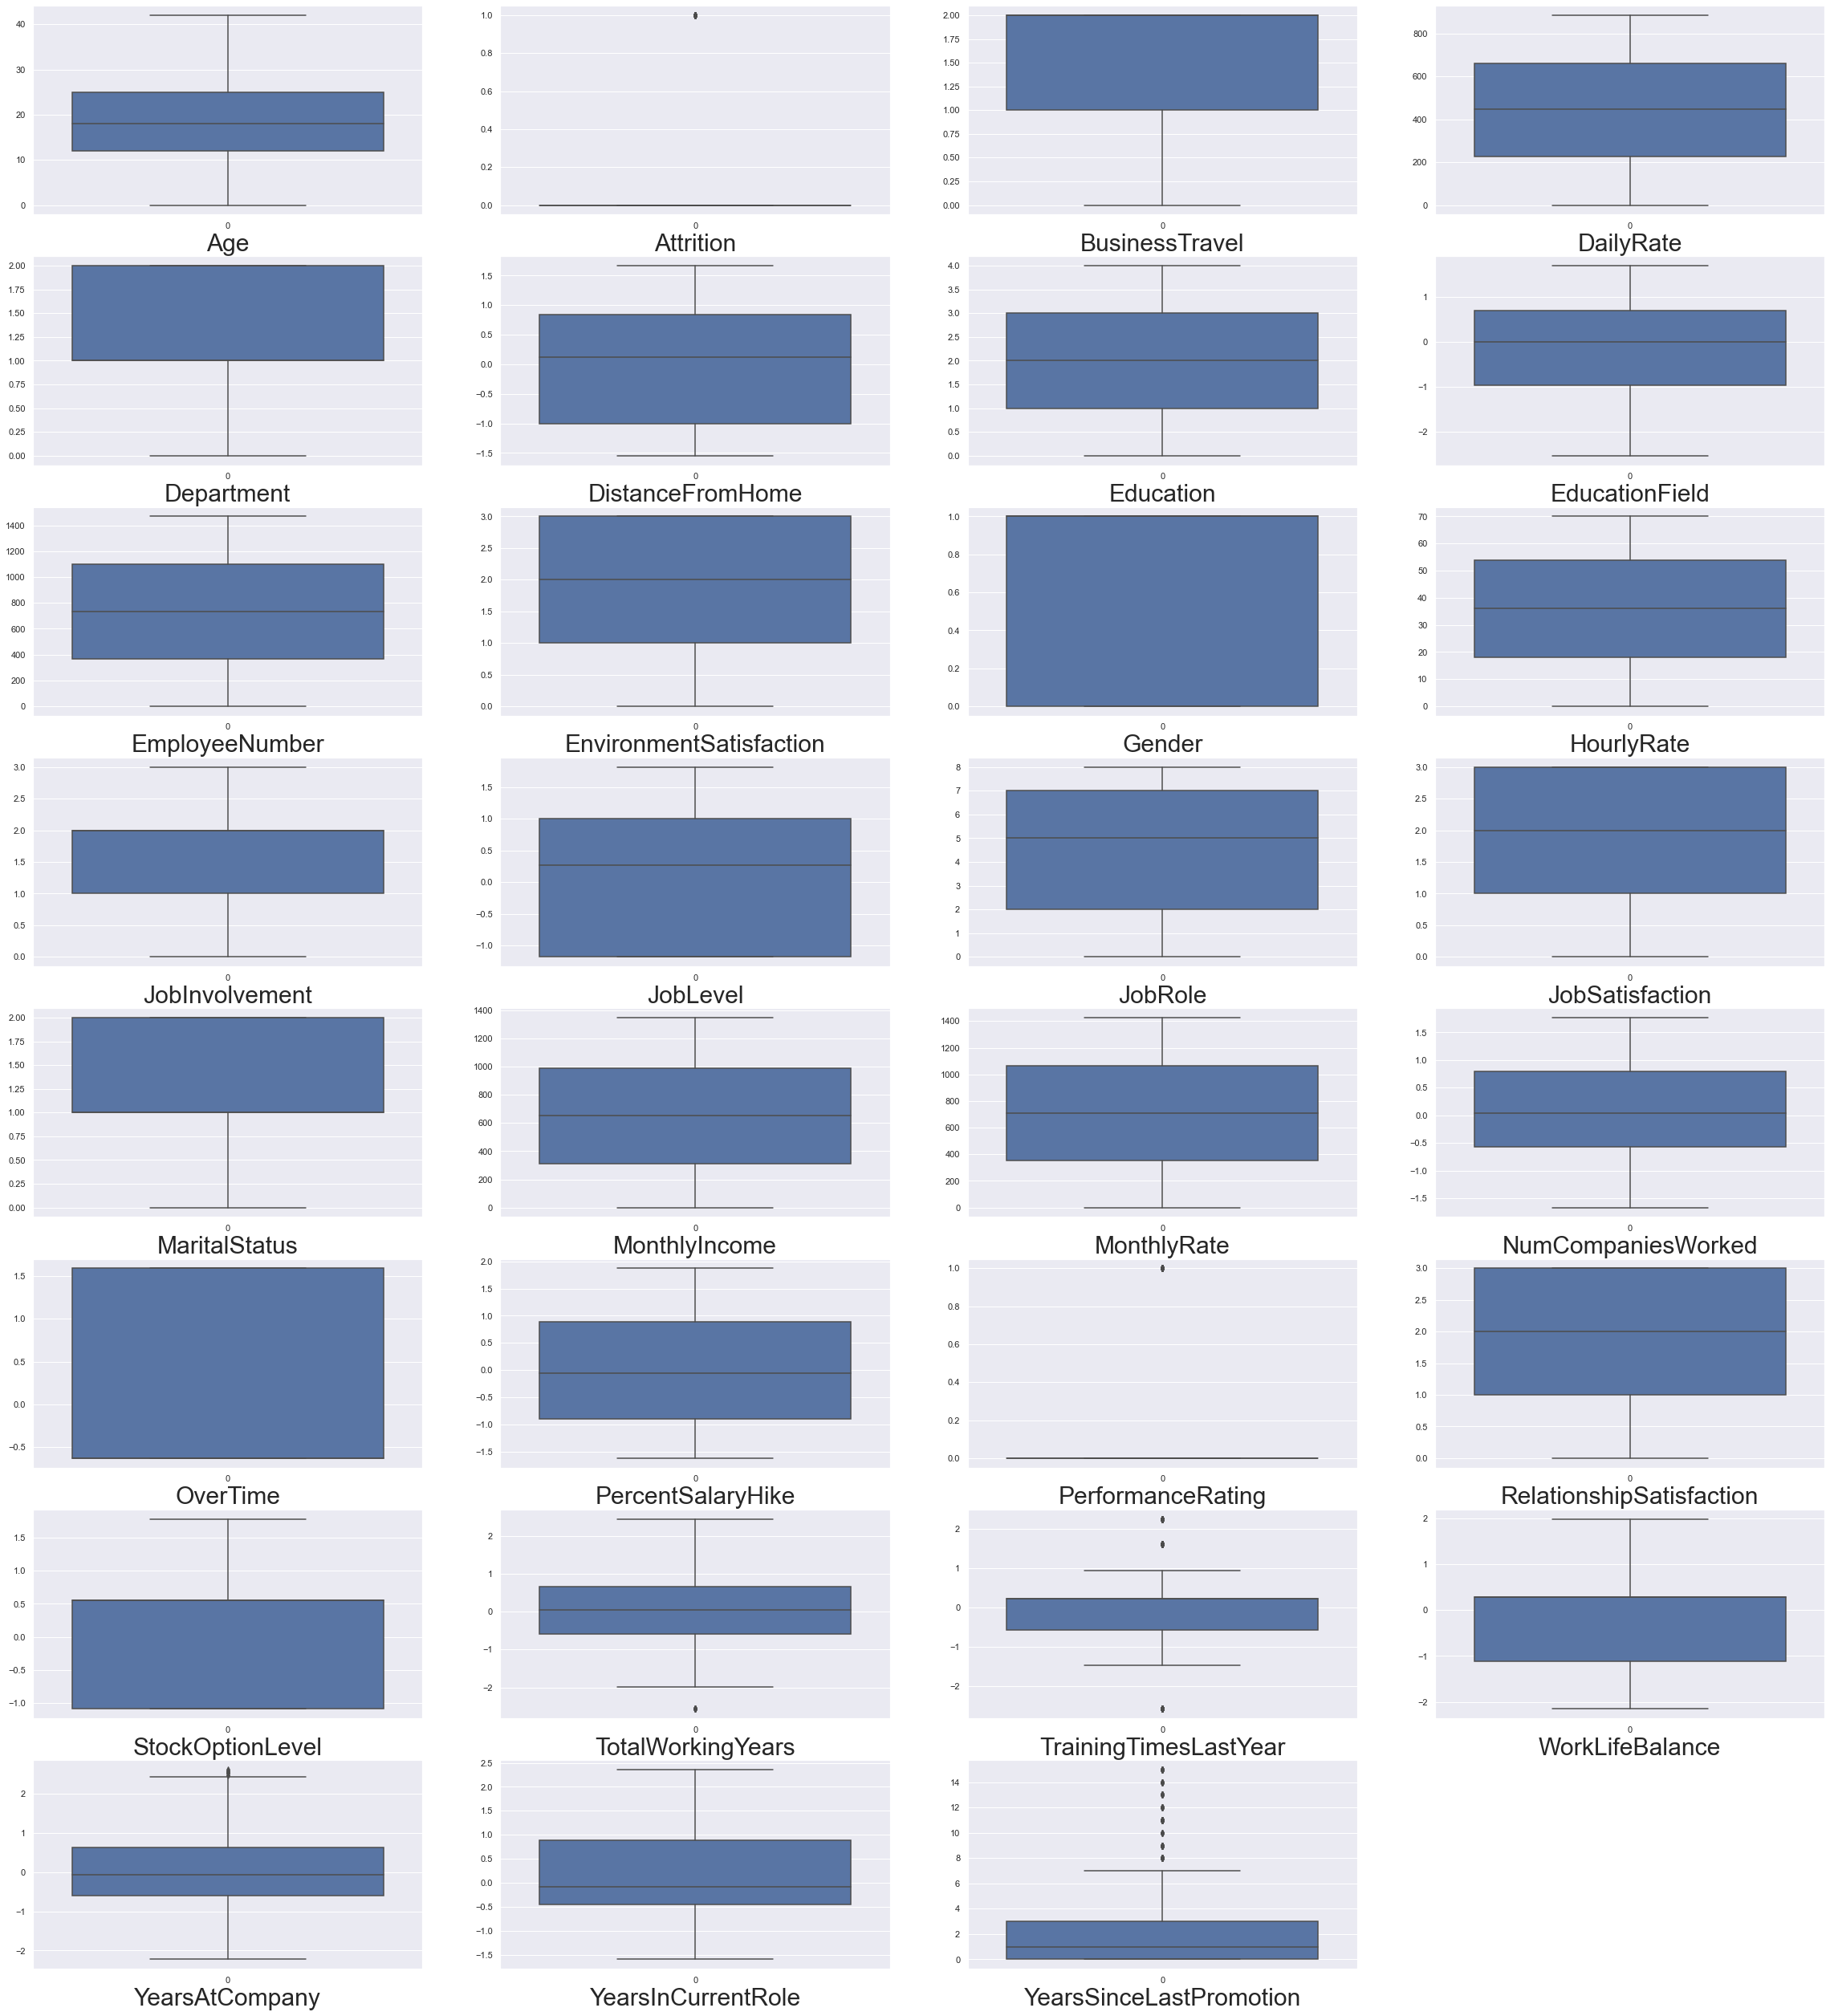

In [43]:
plt.figure(figsize=(40,45))
plotnumber=1

for column in df:
    if plotnumber<32:
        plt.subplot(8,4,plotnumber)
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column,fontsize=30)
        
        plotnumber+=1
plt.show()

Observation: Only some of columns seems having outliers after skewness removed .

# Outliers Removal:

Z-score method:

In [44]:
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([  45,   62,   64,  110,  123,  126,  178,  218,  237,  326,  386,
        425,  427,  535,  584,  595,  653,  701,  752,  799,  838,  861,
        875,  914,  922,  926,  937,  976, 1008, 1078, 1086, 1093, 1138,
       1156, 1221, 1223, 1242, 1295, 1301, 1303, 1331, 1414], dtype=int64), array([30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30], dtype=int64))


In [45]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (1470, 32)
After removing outliers:: (1428, 32)


IQR- Method

In [46]:
from scipy import stats 
IQR = stats.iqr(df) 
IQR 

3.0

In [47]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(39, 32)


Observation: choosing ZSCORE because there is huge dataloss in IQR

In [48]:
df=df_1

# Dividing data into X and Y

In [49]:
x=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [50]:
x.shape

(1428, 31)

In [51]:
y.shape

(1428,)

# scaling X values

In [52]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)

In [53]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
dtype: int64

In [54]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,...,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,0.443744,0.805322,0.500806,0.630252,0.480166,0.476891,0.599697,0.499697,0.573063,0.600140,...,0.153361,0.566527,0.378780,0.508223,0.535674,0.519950,0.453352,0.393421,0.168386,0.397300
std,0.215409,0.331567,0.286632,0.264420,0.311431,0.256468,0.235905,0.289035,0.364934,0.490041,...,0.360462,0.360612,0.348261,0.196720,0.207306,0.241441,0.200755,0.248437,0.235447,0.258274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.500000,0.254525,0.500000,0.168391,0.250000,0.372752,0.249660,0.333333,0.000000,...,0.000000,0.333333,0.000000,0.398063,0.414357,0.250231,0.340681,0.290529,0.000000,0.299693
50%,0.404762,1.000000,0.505090,0.500000,0.518584,0.500000,0.598918,0.497958,0.666667,1.000000,...,0.000000,0.666667,0.569763,0.499244,0.579282,0.588302,0.450606,0.380744,0.090909,0.392457
75%,0.571429,1.000000,0.746606,1.000000,0.741122,0.750000,0.763135,0.750340,1.000000,1.000000,...,0.000000,1.000000,0.569763,0.627994,0.579282,0.588302,0.596304,0.626729,0.181818,0.644798
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observation: data have been scalled

# Imbalanced learn:

Using OverSamling_BorderlineSMOTE

    because there is less data in attrition for yes


<AxesSubplot:xlabel='Attrition', ylabel='count'>

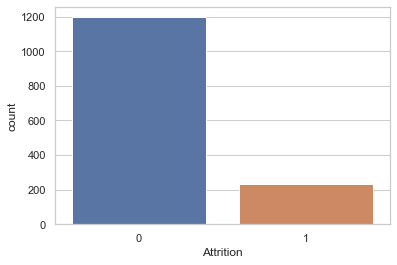

In [55]:
sns.set_style("whitegrid")
sns.countplot(x="Attrition", data=df)

Observation: 

  1.  We can see here Data is not fully balance but we'll treat the imbalace.
  2.  we have around 200 in yes and around 1200 in no.

In [56]:
!pip install imblearn

In [57]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [58]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
failed

Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0

Examining @/win-64::__archspec==1=x86_64:  75%|#######5  | 3/4 [00:01<00:00, 13.72it/s]
                                                                                       

Examining conflict for python imbalanced-learn:   0%|          | 0/4 [00:00<?, ?it/s]
                                                                                     

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - imbalanced-learn -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.9

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the le

# MODEL BUILDING:

In [65]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [66]:
from imblearn.over_sampling import BorderlineSMOTE

In [67]:
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (1428,)
Resample Target dataset shape (2394,)


<AxesSubplot:xlabel='Attrition', ylabel='count'>

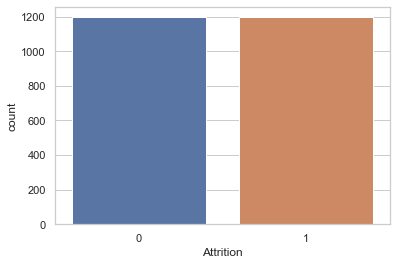

In [68]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

Observation: Now we have balaced data for model training

# Spliting Train and Test data

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [71]:
x_train.shape

(1747, 31)

In [73]:
x_test.shape

(647, 31)

In [74]:
y_train.shape

(1747,)

In [75]:
y_test.shape

(647,)

# LogisticRegression

In [76]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7890444702614408


In [77]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.8299845440494591
[[265  60]
 [ 50 272]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       325
           1       0.82      0.84      0.83       322

    accuracy                           0.83       647
   macro avg       0.83      0.83      0.83       647
weighted avg       0.83      0.83      0.83       647

Training accuracy:: 0.8219805380652547
Test accuracy:: 0.8299845440494591


# DECISION TREE CLASSIFIER

In [78]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.7472025925699461


In [79]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.839258114374034
[[271  54]
 [ 50 272]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       325
           1       0.83      0.84      0.84       322

    accuracy                           0.84       647
   macro avg       0.84      0.84      0.84       647
weighted avg       0.84      0.84      0.84       647

Training accuracy:: 1.0
Test accuracy:: 0.839258114374034


# KNeighborsClassifier

In [80]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8136974694490788


In [81]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8129829984544049
[[212 113]
 [  8 314]]
              precision    recall  f1-score   support

           0       0.96      0.65      0.78       325
           1       0.74      0.98      0.84       322

    accuracy                           0.81       647
   macro avg       0.85      0.81      0.81       647
weighted avg       0.85      0.81      0.81       647

Training accuracy:: 0.8614768174012593
Test accuracy:: 0.8129829984544049


# RandomForestClassifier

In [82]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8720949327836062


In [83]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.9397217928902627
[[316   9]
 [ 30 292]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       325
           1       0.97      0.91      0.94       322

    accuracy                           0.94       647
   macro avg       0.94      0.94      0.94       647
weighted avg       0.94      0.94      0.94       647

Training accuracy:: 1.0
Test accuracy:: 0.9397217928902627


# Gradient Boosting classifier

In [84]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8752353556485357


In [85]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.9134466769706336
[[310  15]
 [ 41 281]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       325
           1       0.95      0.87      0.91       322

    accuracy                           0.91       647
   macro avg       0.92      0.91      0.91       647
weighted avg       0.92      0.91      0.91       647

Training accuracy:: 0.9742415569547797
Test accuracy:: 0.9134466769706336


# ADA BOOST CLASSIFIER

In [86]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8237622036262204


In [87]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.9072642967542504
[[299  26]
 [ 34 288]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       325
           1       0.92      0.89      0.91       322

    accuracy                           0.91       647
   macro avg       0.91      0.91      0.91       647
weighted avg       0.91      0.91      0.91       647

Training accuracy:: 0.9324556382369776
Test accuracy:: 0.9072642967542504



OBSERVATION:

Choosing :

          ADA BOOST CLASSIFIER as final model

          for HYPER PARAMETER TUNING because both train and test accuracies are pretty close and highest as well

         Rest of the models having huge difference between train and test accuracies so not considering them.



# HYPER PARAMETER TUNING:

In [88]:
adb=AdaBoostClassifier()
param_grid={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[50,200,10],
    'learning_rate':[0.1,0.5,1.0],
     'random_state':[10]              
}

In [89]:
adb_grid=GridSearchCV(AdaBoostClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [90]:
adb_grid.fit(x_train,y_train)
adb_pred=adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,adb_pred))

Fitting 4 folds for each of 9 candidates, totalling 36 fits
Accuracy after parameter tuning:: 0.9289026275115919


In [91]:
adb_grid.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 10}

model training with best parameters:

In [92]:
best_param={
    'algorithm' : ['SAMME.R'],
    'n_estimators':[200],
    'learning_rate':[0.5],
     'random_state':[10]    }

In [93]:
best_adb_grid=GridSearchCV(AdaBoostClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [94]:
best_adb_grid.fit(x_train,y_train)
best_adb_pred=best_adb_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_adb_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.9304482225656878


Observation: As we notice after HYPER PARAMETER TUNING models accuracy score got increased

# Report of AdaBoostClassifier

In [95]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_adb_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       325
           1       0.97      0.89      0.93       322

    accuracy                           0.93       647
   macro avg       0.93      0.93      0.93       647
weighted avg       0.93      0.93      0.93       647



In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
print("roc auc score::",roc_auc_score(y_test, best_adb_pred))

roc auc score:: 0.930267558528428


In [98]:
from sklearn.metrics import roc_curve

In [99]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_adb_pred, pos_label=1)

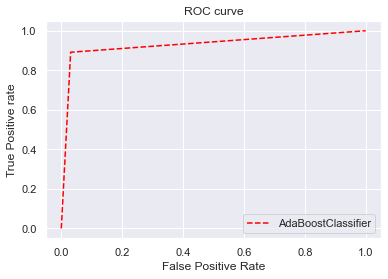

In [100]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='AdaBoostClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# Saving Model:

In [102]:
import pickle
filename='HR Analytics Project.pkl'
pickle.dump(best_adb_grid,open(filename,'wb'))

In [103]:
loaded_model=pickle.load(open('HR Analytics Project.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

93.04482225656878
